# Ejercicio 4

Considere la misma habitación del ejercicio 03 (tasa de entrada $\lambda = 2/hora$) de capacidad infinita. También considere ahora que de la habitación salen pallets a una tasa $\mu = 3/hora$ bajo una distribución Poisson. Simular el sistema luego de 4 horas. Definir el estado del sistema, graficarlo en función del tiempo y detallar en una tabla la simulación contemplando los arribos y los despachos.

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

## Creamos las funciones necesarias:

In [2]:
# Función de sampleo de valor de variable aleatoria exponencial:

def samplear_exponencial(tasa, r):
    Aux= -(1/tasa)* np.log(1-r)
    return Aux

In [3]:
# Función de acumulada:

def calcular_acumulada(tasa, horizonte_t):
    acum = [0]
    t_acum = acum[-1]
    
    while (t_acum <= horizonte_t):
        
        # Sampleo exponencial:
        u=random.uniform(0.001, 0.999)
        tiempo = samplear_exponencial(tasa,u)
        
        t_acum = tiempo + acum[-1]
        
        if t_acum <= horizonte_t:
            # Acumulada:
            acum.append(t_acum)
        
    return acum[1:]

## Resolvemos el ejercicio:

In [4]:
# Para poder contar de dos fuentes aleatorias distintas tenemos que ir paso por paso en el tiempo viendo qué 
# evento aparece primero y cuál después.

# resolución de ejercicio 4

lam = 2 # tasa de arribos
mu = 3 # tasa de salidas
horizonte_t = 4

# Sampleo de arribos
entradas_acum = calcular_acumulada(lam, horizonte_t)
# Sampleo de salidas
salidas_acum = calcular_acumulada(mu, horizonte_t)

print(f'entradas: {entradas_acum}\n')

print(f'salidas: {salidas_acum}')

entradas: [0.46346989655257326, 0.47209548294191184, 0.6205802557524271, 1.5315408380238433, 2.2181737616093327, 2.390216252451267, 3.0489123686841006, 3.1564432336927104]

salidas: [0.014964967315626779, 0.7676219281717739, 0.9975219519726651, 1.1308302479631993, 1.3335210516665152, 1.371151451695922, 1.8786896748781277, 2.0395446641437904, 2.4187806876234017, 2.7761417683638125, 3.3569400136875984, 3.7334116949057146]


In [5]:
# Creamos los elementos "cantidad" para hacer conteos, y "tabla", un diccionario para guardar los datos:

cantidad = 0
tabla = {}
entradas = entradas_acum.copy()
salidas = salidas_acum.copy()

# Comenzamos el loop yendo tiempo a tiempo y viendo qué evento aparece primero:

while (len(entradas) | len(salidas)):
    
    
    # Tomamos el último valor de entradas y salidas:
    tiempo_actual_entrada = entradas[0] if len(entradas) else np.inf
    tiempo_actual_salida = salidas[0] if len(salidas) else np.inf
    
    # El valor siguiente es una entrada o salida?
    if (tiempo_actual_entrada < tiempo_actual_salida):
        # Quitar el tiempo de la lista:
        entradas.pop(0)
        
        # Aumentar la cantidad acumulada:
        cantidad = cantidad + 1
        
        # Guardar todo en el diccionario:
        tabla.update({tiempo_actual_entrada: (cantidad, 'entrada')})
        
    else:
        # Quitar el tiempo de la lista:
        salidas.pop(0)
        
        # Hay cantidad en stock para hacer la salida?
        if (cantidad - 1 > 0):
            
            # Si hay sacar 1 unidad del stock:
            cantidad = cantidad - 1
            
            # Gurdar todo en el diccionario:
            tabla.update({tiempo_actual_salida: (cantidad, 'salida')})
            
# Armamos un dataframe de pandas para poder visualizar todo bien:
df_eventos = pd.DataFrame(tabla.values(), columns=['Cantidad Acumulada', 'Evento'], index=tabla.keys())

# Imprimimos
print(df_eventos)


          Cantidad Acumulada   Evento
0.463470                   1  entrada
0.472095                   2  entrada
0.620580                   3  entrada
0.767622                   2   salida
0.997522                   1   salida
1.531541                   2  entrada
1.878690                   1   salida
2.218174                   2  entrada
2.390216                   3  entrada
2.418781                   2   salida
2.776142                   1   salida
3.048912                   2  entrada
3.156443                   3  entrada
3.356940                   2   salida
3.733412                   1   salida


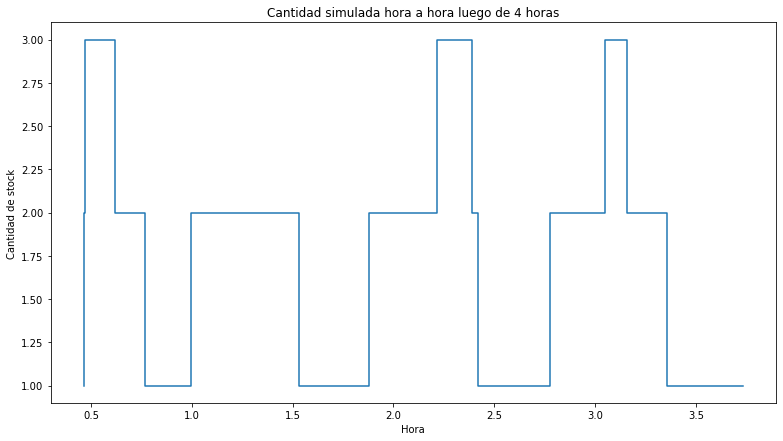

In [6]:
# Creamos una figura y el gráfico de barras:
plt.figure(figsize=(13,7))

tiempos = list(tabla.keys())
cantidad = list(zip(*tabla.values()))[0]

plt.step(tiempos, cantidad)

# Seteamos título y etiquetas de los ejes:
plt.title(f'Cantidad simulada hora a hora luego de {horizonte_t} horas')
plt.ylabel('Cantidad de stock')
plt.xlabel('Hora')

# Mostramos el gráfico:
plt.show()